## Tic-Tac-Toe Agent
​
In this notebook, you will learn to build an RL agent (using Q-learning) that learns to play Numerical Tic-Tac-Toe with odd numbers. The environment is playing randomly with the agent, i.e. its strategy is to put an even number randomly in an empty cell. The following is the layout of the notebook:
        - Defining epsilon-greedy strategy
        - Tracking state-action pairs for convergence
        - Define hyperparameters for the Q-learning algorithm
        - Generating episode and applying Q-update equation
        - Checking convergence in Q-values

#### Importing libraries
Write the code to import Tic-Tac-Toe class from the environment file

In [99]:
# from <TC_Env> import <TicTacToe> - import your class from environment file
from TCGame_Env1 import TicTacToe
import collections
import numpy as np
import random
import pickle
import time
from matplotlib import pyplot as plt

env= TicTacToe()

In [100]:
# Function to convert state array into a string to store it as keys in the dictionary
# states in Q-dictionary will be of form: x-4-5-3-8-x-x-x-x
#   x | 4 | 5
#   ----------
#   3 | 8 | x
#   ----------
#   x | x | x

def Q_state(state):

    return ('-'.join(str(e) for e in state)).replace('nan','x')

In [101]:
# Defining a function which will return valid (all possible actions) actions corresponding to a state
# Important to avoid errors during deployment.

def valid_actions(state):

    valid_Actions = []
    
    valid_Actions = [i for i in env.action_space(state)[0]] ###### -------please call your environment as env
    return valid_Actions

In [102]:
# Defining a function which will add new Q-values to the Q-dictionary. 
def add_to_dict(state):
    state1 = Q_state(state)
    
    valid_act = valid_actions(state)
    if state1 not in Q_dict.keys():
        for action in valid_act:
            Q_dict[state1][action]=0

In [67]:
Q_state(env.state)

'x-x-x-x-x-x-x-x-x'

#### Epsilon-greedy strategy - Write your code here

(you can build your epsilon-decay function similar to the one given at the end of the notebook)

In [103]:
# Defining epsilon-greedy policy. You can choose any function epsilon-decay strategy

def epsilon_greedy(state, time):
    max_epsilon = 1.0
    min_epsilon = 0.001
    epsilon = (min_epsilon + (max_epsilon - min_epsilon) * np.exp(-0.000001*time))
    
    z= np.random.random()
    state1= Q_state(state)
    valid_act = valid_actions(state)
    
    if z > epsilon:
        action = max(Q_dict[state1], key=Q_dict[state1].get)
        p= 'Exploitation'
    else:
        action= random.choice(valid_act)
        p= 'Exploration'
        
    return action

#### Tracking the state-action pairs for checking convergence - write your code here

In [104]:
# Initialise Q_dictionary as 'Q_dict' and States_tracked as 'States_track' (for convergence)
Q_dict = collections.defaultdict(dict)

States_track = collections.defaultdict(dict)

In [105]:
# Initialise states to be tracked
def initialise_tracking_states():
    sample_q_values = [('x-1-x-4-x-x-x-x-x',(0,3)),('x-x-1-x-x-x-x-4-x',(1,5)),('x-x-5-x-x-x-x-2-x',(1,7)),('x-x-x-x-5-2-x-7-8',(2,9)),('2-6-x-x-x-9-3-x-x',(2,7))]    #select any 4 Q-values
    for q_values in sample_q_values:
        state = q_values[0]
        action = q_values[1]
        States_track[state][action] = []

In [106]:
#Defining a function to save the Q-dictionary as a pickle file

def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

In [107]:
def save_tracking_states():
    for state in States_track.keys():
        for action in States_track[state].keys():
            if state in Q_dict and action in Q_dict[state]:
                States_track[state][action].append(Q_dict[state][action])

In [108]:
initialise_tracking_states()

#### Define hyperparameters  ---write your code here

In [109]:
#EPISODES = 20
EPISODES = 1000000
LR = 0.01                   #learning rate
GAMMA = 0.91

threshold = 50000       #every these many episodes, the 4 Q-values will be stored/appended (convergence graphs)
#threshold = 1
policy_threshold = 52000    #every these many episodes, the Q-dict will be updated

### Q-update loop ---write your code here

In [110]:
import time 
start_time = time.time()

for episode in range(EPISODES):
    env = TicTacToe() # call the environment
    curr_state = env.state
    if episode%20000==1:
        print('Episodes completed-', episode-1)
        
    done = False  
    add_to_dict(curr_state)  # adding the current state to dictionary

    while done != True:  
        curr_state1 = Q_state(curr_state)
        curr_action = epsilon_greedy(curr_state, episode)   # applying epislon method
        next_state, reward, done = env.step(curr_state, curr_action) # getting rewar
        next_state_temp = Q_state(next_state)
        add_to_dict(next_state)


        

        # Updating rules
        if done != True:
            max_next = max(Q_dict[next_state_temp],key=Q_dict[next_state_temp].get)  
                #this gets the action corresponding to max q-value of next state
            Q_dict[curr_state1][curr_action] += LR * ((reward + (GAMMA*(Q_dict[next_state_temp][max_next])))
                                                      - Q_dict[curr_state1][curr_action] ) 
        else:
            Q_dict[curr_state1][curr_action] += LR * ((reward - Q_dict[curr_state1][curr_action]))

        # navigating to next state
        curr_state = next_state
        
     #states tracking   
    if ((episode+1)%threshold)==0:
        save_tracking_states()
        save_obj(States_track,'States_tracking')
#         print(episode) 

    if ((episode+1)% policy_threshold) == 0:  #every 50000th episodes, the Q-dict will be saved
        save_obj(Q_dict,'Policy_Q_dict')  
        

elapsed_time = time.time() - start_time
save_obj(States_track,'States_tracking')   
save_obj(Q_dict,'Policy_Q_dict')

print('Elapsed_time: ', elapsed_time)

Episodes completed- 0
Episodes completed- 20000
Episodes completed- 40000
Episodes completed- 60000
Episodes completed- 80000
Episodes completed- 100000
Episodes completed- 120000
Episodes completed- 140000
Episodes completed- 160000
Episodes completed- 180000
Episodes completed- 200000
Episodes completed- 220000
Episodes completed- 240000
Episodes completed- 260000
Episodes completed- 280000
Episodes completed- 300000
Episodes completed- 320000
Episodes completed- 340000
Episodes completed- 360000
Episodes completed- 380000
Episodes completed- 400000
Episodes completed- 420000
Episodes completed- 440000
Episodes completed- 460000
Episodes completed- 480000
Episodes completed- 500000
Episodes completed- 520000
Episodes completed- 540000
Episodes completed- 560000
Episodes completed- 580000
Episodes completed- 600000
Episodes completed- 620000
Episodes completed- 640000
Episodes completed- 660000
Episodes completed- 680000
Episodes completed- 700000
Episodes completed- 720000
Episodes c

#### Check the Q-dictionary

In [111]:
Q_dict

defaultdict(dict,
            {'x-x-x-x-x-x-x-x-x': {(0, 1): -1.2305388973655997,
              (0, 3): -1.2316005608044094,
              (0, 5): -1.229385897836368,
              (0, 7): -1.2293708625729167,
              (0, 9): -1.2290507982278858,
              (1, 1): -1.2289908949142783,
              (1, 3): -1.229126883463565,
              (1, 5): -1.2293485250140075,
              (1, 7): -1.2291537283704794,
              (1, 9): -1.2309974676788074,
              (2, 1): -1.2296666091911228,
              (2, 3): -1.2292914123957794,
              (2, 5): -1.2300957931639147,
              (2, 7): -1.231123803142787,
              (2, 9): -1.2321285568636826,
              (3, 1): -1.2291139736975827,
              (3, 3): -1.2289426448909957,
              (3, 5): -1.2294688903785485,
              (3, 7): -1.2295481033638598,
              (3, 9): -1.2297507400489183,
              (4, 1): -1.2298550324310675,
              (4, 3): -1.2289089581430424,
              (4, 

In [112]:
len(Q_dict)

1552733

In [114]:
# try checking for one of the states - that which action your agent thinks is the best  -----This will not be evaluated
with open('States_tracking.pkl', 'rb') as handle:
    States_track = pickle.load(handle)

print(len(States_track))

5


In [115]:
for key, value in States_track.items():
    for k , v in value.items():
        print(key, k)

x-1-x-4-x-x-x-x-x (0, 3)
x-x-1-x-x-x-x-4-x (1, 5)
x-x-5-x-x-x-x-2-x (1, 7)
x-x-x-x-5-2-x-7-8 (2, 9)
2-6-x-x-x-9-3-x-x (2, 7)


#### Check the states tracked for Q-values convergence
(non-evaluative)

In [0]:
# Write the code for plotting the graphs for state-action pairs tracked

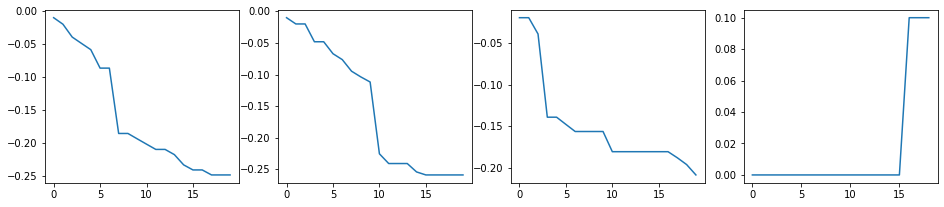

In [121]:
plt.figure(0, figsize=(16,7))

##fig 1
xaxis= np.asarray(range(0, len(States_track['x-1-x-4-x-x-x-x-x'][(0,3)])))
plt.subplot(241)
plt.plot(xaxis, np.asarray(States_track['x-1-x-4-x-x-x-x-x'][(0,3)]))

##fig 2
plt.figure(0, figsize=(16,7))
xaxis= np.asarray(range(0, len(States_track['x-x-1-x-x-x-x-4-x'][(1,5)])))
plt.subplot(242)
plt.plot(xaxis, np.asarray(States_track['x-x-1-x-x-x-x-4-x'][(1,5)]))

##fig 3
plt.figure(0, figsize=(16,7))
xaxis= np.asarray(range(0, len(States_track['x-x-5-x-x-x-x-2-x'][(1,7)])))
plt.subplot(243)
plt.plot(xaxis, np.asarray(States_track['x-x-5-x-x-x-x-2-x'][(1,7)]))

##fig 4
plt.figure(0, figsize=(16,7))
xaxis= np.asarray(range(0, len(States_track['2-6-x-x-x-9-3-x-x'][(2,7)])))
plt.subplot(244)
plt.plot(xaxis, np.asarray(States_track['2-6-x-x-x-9-3-x-x'][(2,7)]))

plt.show()

### Epsilon - decay check

In [122]:
max_epsilon = 1.0
min_epsilon = 0.001
time = np.arange(0,5000000)
epsilon = []
for i in range(0,5000000):
    epsilon.append(min_epsilon + (max_epsilon - min_epsilon) * np.exp(-0.000001*i))

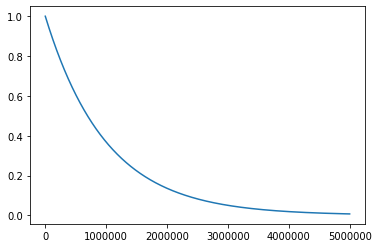

In [123]:
plt.plot(time, epsilon)
plt.show()